<a href="https://colab.research.google.com/github/CUNY-SPS-Data-Science-Program/your-bio-mianshariq/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from fredapi import Fred
import requests
import pandas as pd
import seaborn as sns
fred = Fred(api_key="22380b524661c75bc5c6bb7c41ad79b7")


In [104]:
fred = Fred(api_key="22380b524661c75bc5c6bb7c41ad79b7")
fed_funds_rate = fred.get_series("FEDFUNDS", observation_start='1998-09-1')
fed_funds_rate

1998-09-01    5.51
1998-10-01    5.07
1998-11-01    4.83
1998-12-01    4.68
1999-01-01    4.63
              ... 
2023-04-01    4.83
2023-05-01    5.06
2023-06-01    5.08
2023-07-01    5.12
2023-08-01    5.33
Length: 300, dtype: float64

In [160]:
unemp_rate =fred.get_series('UNRATE', observation_start='1998-09-1')
unemp_rate

1998-09-01    4.6
1998-10-01    4.5
1998-11-01    4.4
1998-12-01    4.4
1999-01-01    4.3
             ... 
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
Length: 300, dtype: float64

In [161]:
cpi_index =fred.get_series('CORESTICKM159SFRBATL', observation_start='1998-09-1')
cpi_index.index


DatetimeIndex(['1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', length=300, freq=None)

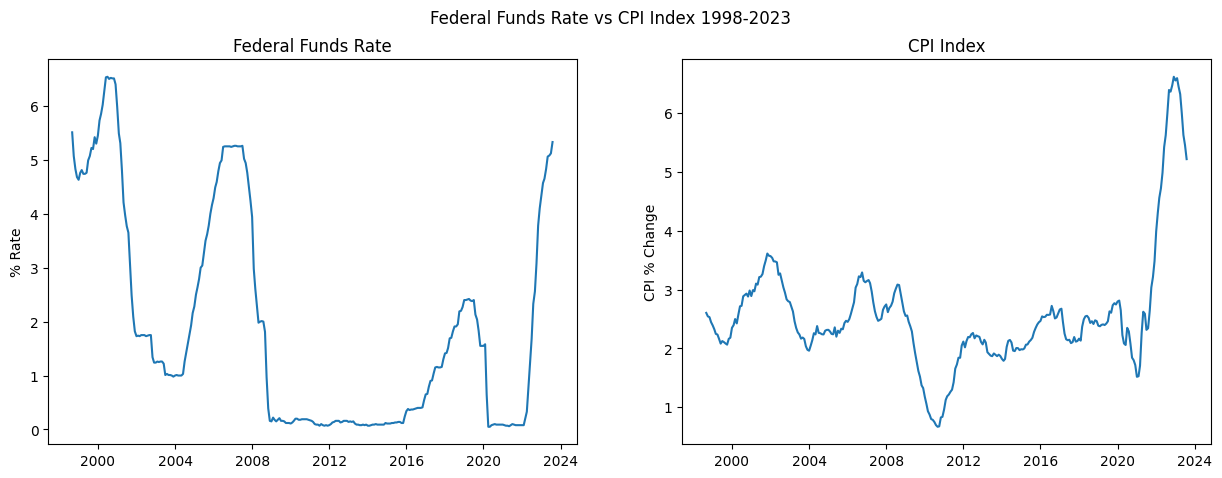

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
fig.suptitle('Federal Funds Rate vs Inflation 1998-2023')

# Plot on the first subplot (axs[0])
axs[0].plot(fed_funds_rate.index, fed_funds_rate.values)
axs[0].set_title("Federal Funds Rate")
axs[0].set_ylabel("% Rate")

# Plot on the second subplot (axs[1])
axs[1].plot(cpi_index.index, cpi_index.values)
axs[1].set_title("CPI Index")
axs[1].set_ylabel("CPI % Change")

plt.show()


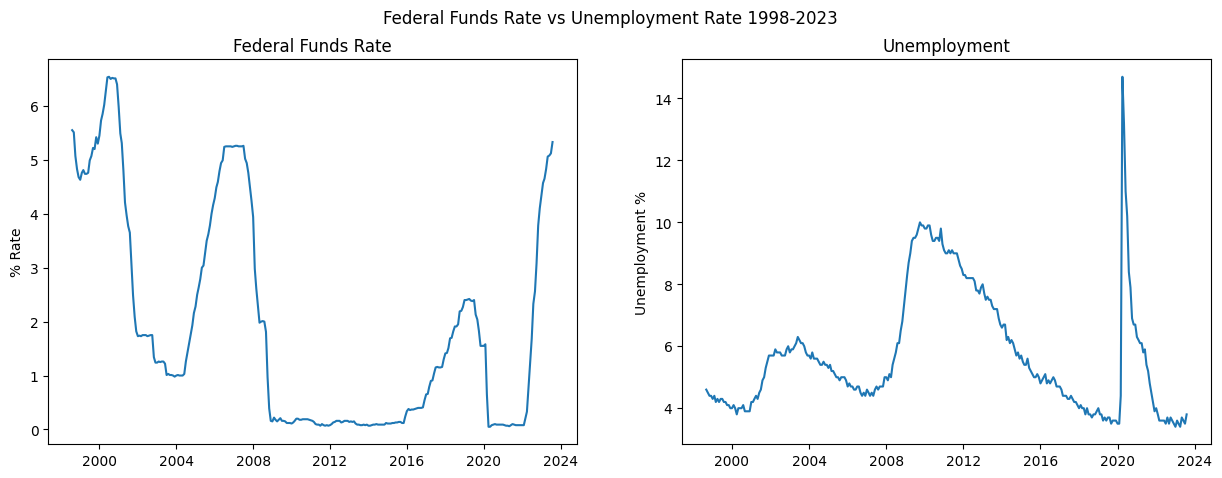

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
fig.suptitle('Federal Funds Rate vs Unemployment Rate 1998-2023')

# Plot on the first subplot (axs[0])
axs[0].plot(fed_funds_rate.index, fed_funds_rate.values)
axs[0].set_title("Federal Funds Rate")
axs[0].set_ylabel("% Rate")

axs[1].plot(unemp_rate.index,unemp_rate.values)
axs[1].set_title("Unemployment")
axs[1].set_ylabel("Unemployment %")

plt.show()


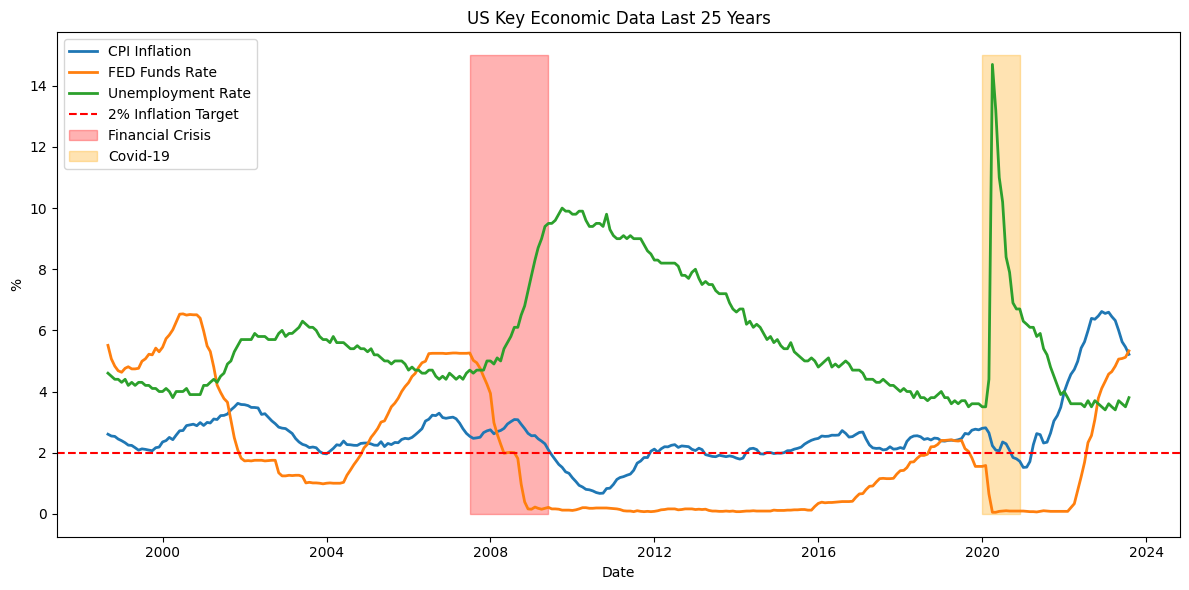

In [148]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the CPI data
ax.plot(cpi_index.index, cpi_index.values, label="CPI Inflation", linewidth=2)

# Plot the FED Funds Rate data
ax.plot(fed_funds_rate.index, fed_funds_rate.values, label="FED Funds Rate", linewidth=2)

# Plot the Unemployment Rate data
ax.plot(unemp_rate.index, unemp_rate.values, label="Unemployment Rate", linewidth=2)

# Plot the Unemployment Rate data
ax.axhline(y=2, color='red', linestyle='--', label='2% Inflation Target')

# Highlight the financial crisis period (2008-2013)
plt.fill_between(unemp_rate.index, 0, 15, where=(unemp_rate.index >= '2007-07-01') & (unemp_rate.index <= '2009-06-01'), color='red', alpha=0.3, label='Financial Crisis')
plt.fill_between(unemp_rate.index, 0, 15, where=(unemp_rate.index >= '2020-01-01') & (unemp_rate.index <= '2020-12-01'), color='orange', alpha=0.3, label='Covid-19')

# # Add annotations for the financial crisis
# plt.annotate('Financial Crisis', xy=('2010-01-01', 5.0), fontsize=12, color='red')

# Customize the plot (add labels, legend, title, etc.)
ax.set_xlabel("Date")
ax.set_ylabel("%")
ax.set_title("US Key Economic Data Last 25 Years")
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [181]:
fed_funds_rate_df = pd.DataFrame(fed_funds_rate, columns=['Fed_Funds_Rate'])
unemp_rate_df = pd.DataFrame(unemp_rate, columns=[ 'Unemployment Rate'])
cpi_index_df = pd.DataFrame(cpi_index, columns=['CPI_Index'])
merged_df = fed_funds_rate_df.join(unemp_rate_df)
merged_df = merged_df.join(cpi_index_df)
merged_df

,Fed_Funds_Rate,Unemployment Rate,CPI_Index
1998-09-01,5.51,4.6,2.603432
1998-10-01,5.07,4.5,2.544353
1998-11-01,4.83,4.4,2.531447
1998-12-01,4.68,4.4,2.446190
1999-01-01,4.63,4.3,2.390759
...,...,...,...
2023-04-01,4.83,3.4,6.322749
2023-05-01,5.06,3.7,6.000606
2023-06-01,5.08,3.6,5.626529
2023-07-01,5.12,3.5,5.456089


In [191]:
def determine_cycle(date):
    if date < pd.Timestamp('2001-02-01'):
        return '<2001'
    elif date < pd.Timestamp('2007-02-01'):
        return '2001-2007'
    elif date < pd.Timestamp('2019-02-01'):
        return '2007-2019'
    else:
        return '>2019'


# Apply the function to create a new 'Cycle' column
merged_df['Cycle'] =fed_funds_rate_df.index.map(determine_cycle)


In [192]:
merged_df

,Fed_Funds_Rate,Unemployment Rate,CPI_Index,Cycle
1998-09-01,5.51,4.6,2.603432,<2001
1998-10-01,5.07,4.5,2.544353,<2001
1998-11-01,4.83,4.4,2.531447,<2001
1998-12-01,4.68,4.4,2.446190,<2001
1999-01-01,4.63,4.3,2.390759,<2001
...,...,...,...,...
2023-04-01,4.83,3.4,6.322749,>2019
2023-05-01,5.06,3.7,6.000606,>2019
2023-06-01,5.08,3.6,5.626529,>2019
2023-07-01,5.12,3.5,5.456089,>2019


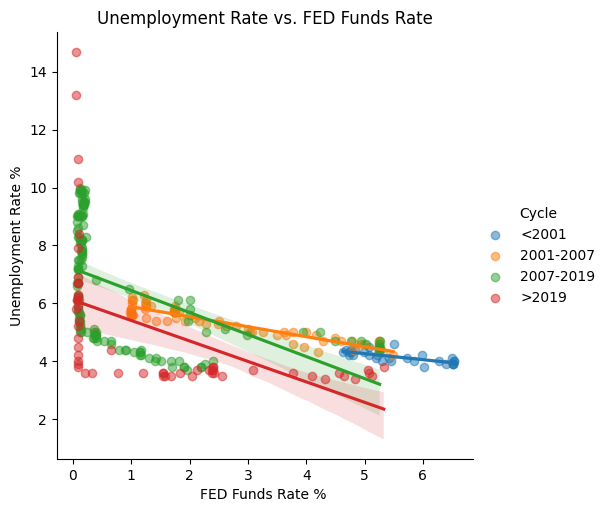

In [198]:
sns.lmplot(
    x='Fed_Funds_Rate',  # Replace with the actual column name from df2
    y='Unemployment Rate',  # Replace with the actual column name from df2
    data=merged_df,
    hue='Cycle',
    scatter_kws={'alpha': 0.5}
)
plt.title('Unemployment Rate vs. FED Funds Rate')
plt.xlabel('FED Funds Rate % ')
plt.ylabel('Unemployment Rate %')

plt.show()

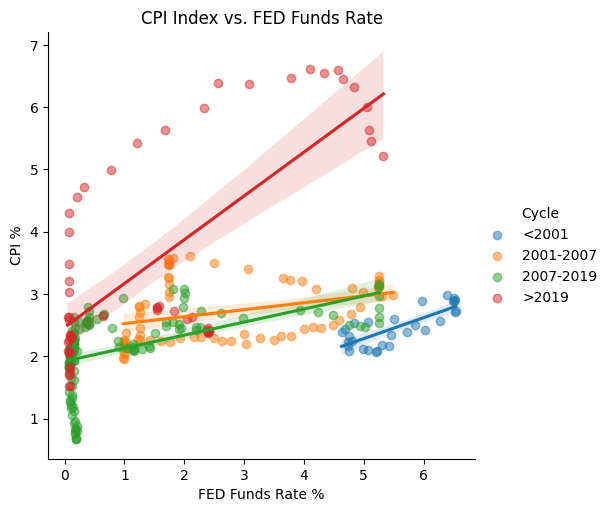

In [199]:
sns.lmplot(
    x='Fed_Funds_Rate',  # Replace with the actual column name from df2
    y='CPI_Index',  # Replace with the actual column name from df2
    data=merged_df,
    hue='Cycle',
    scatter_kws={'alpha': 0.5}
)
plt.title('CPI Index vs. FED Funds Rate')
plt.xlabel('FED Funds Rate %')
plt.ylabel('CPI %')

plt.show()

In [ ]:
import plotly.express as px
fig = px.line(target, x=target.index, y=list(target.columns))

fig.update_layout(
    title={
        'text': "Key Global Economic Indicators",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Date",
    yaxis_title="Value",
)

fig.show()